In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Read data
data = pd.read_csv("train.csv", sep = ";")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.6,0.3,0.36,1.2,0.035,43,126,0.9909,3.01,0.63,11.4,6,white
1,7.7,0.5,0.26,1.9,0.062,9,31,0.9966,3.39,0.64,9.6,5,red
2,8.4,0.5,0.35,2.9,0.076,21,127,0.9976,3.23,0.63,9.2,5,red
3,7.5,0.4,0.33,5.0,0.045,30,131,0.9942,3.32,0.44,10.9,6,white
4,6.4,0.2,0.25,20.2,0.083,35,157,0.9998,3.17,0.50,9.1,5,white


In [4]:
#Change Type to bit
data.type = data.type.apply(lambda x : x.replace("white","1"))
data.type = data.type.apply(lambda x : x.replace("red","0"))

In [5]:
#Check missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6714 non-null   float64
 1   volatile acidity      6714 non-null   float64
 2   citric acid           6714 non-null   float64
 3   residual sugar        6714 non-null   float64
 4   chlorides             6714 non-null   float64
 5   free sulfur dioxide   6714 non-null   int64  
 6   total sulfur dioxide  6714 non-null   int64  
 7   density               6714 non-null   float64
 8   pH                    6714 non-null   float64
 9   sulphates             6714 non-null   float64
 10  alcohol               6714 non-null   float64
 11  quality               6714 non-null   int64  
 12  type                  6714 non-null   object 
dtypes: float64(9), int64(3), object(1)
memory usage: 682.0+ KB


In [6]:
data_w = data[data.type == '1']
data_r = data[data.type == '0']

In [7]:
#describe data
data_w.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000
mean,6.849382,0.281918,0.334981,6.450780,0.045699,35.326171,138.253598,0.994027,3.186986,0.489507,10.521589,5.869856
std,0.834424,0.103279,0.122993,5.087312,0.021556,16.810452,42.441591,0.003004,0.150308,0.114162,1.232956,0.893389
min,3.800000,0.100000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987100,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.200000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991700,3.080000,0.410000,9.500000,5.000000
50%,6.800000,0.300000,0.310000,5.300000,0.043000,34.000000,134.000000,0.993700,3.170000,0.480000,10.400000,6.000000
75%,7.300000,0.300000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.039000,3.820000,1.080000,14.200000,9.000000


In [8]:
data_r.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000
mean,8.365806,0.532678,0.268956,2.534307,0.090209,15.747333,48.994947,0.996900,3.308063,0.665227,10.284672,5.591802
std,1.748053,0.176925,0.196037,1.310557,0.052463,10.298039,33.997430,0.001824,0.155118,0.187593,1.042424,0.821837
min,4.600000,0.100000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990100,2.740000,0.320000,8.400000,3.000000
25%,7.200000,0.400000,0.090000,1.900000,0.072000,8.000000,23.000000,0.995900,3.200000,0.550000,9.500000,5.000000
50%,7.900000,0.500000,0.250000,2.200000,0.080000,13.000000,40.000000,0.996900,3.310000,0.620000,10.000000,5.000000
75%,9.200000,0.600000,0.430000,2.600000,0.092000,21.000000,65.000000,0.997900,3.400000,0.740000,10.900000,6.000000
max,15.900000,1.300000,1.010000,13.800000,0.611000,72.000000,289.000000,1.003200,4.010000,2.000000,14.900000,8.000000


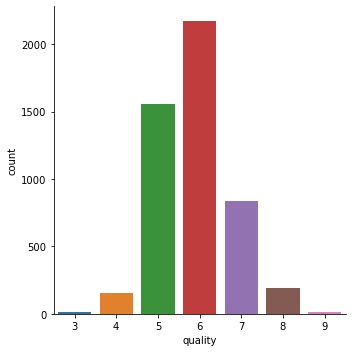

In [9]:
# number of values for each quality
sns.catplot(x='quality', data = data_w, kind = 'count')

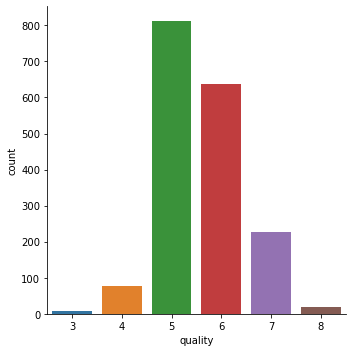

In [10]:
sns.catplot(x='quality', data = data_r, kind = 'count')

In [11]:
#correlation
correlation_w = data_w.corr()
correlation_r = data_r.corr()

<AxesSubplot:>

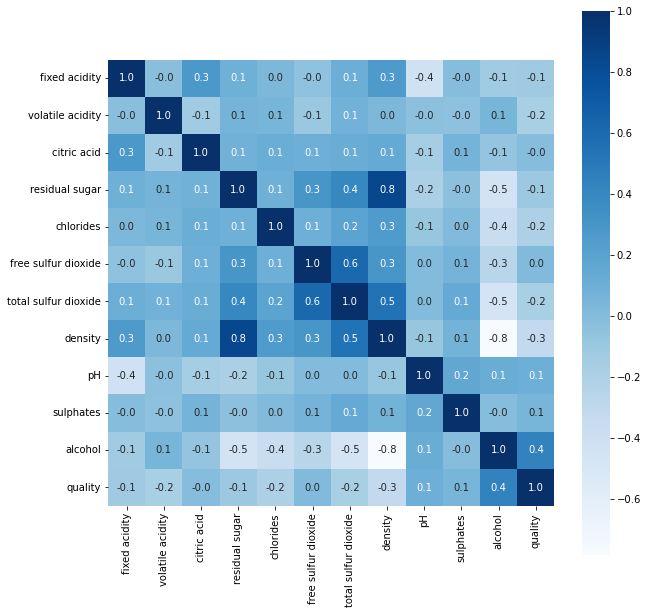

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_w, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':10}, cmap = 'Blues')

<AxesSubplot:>

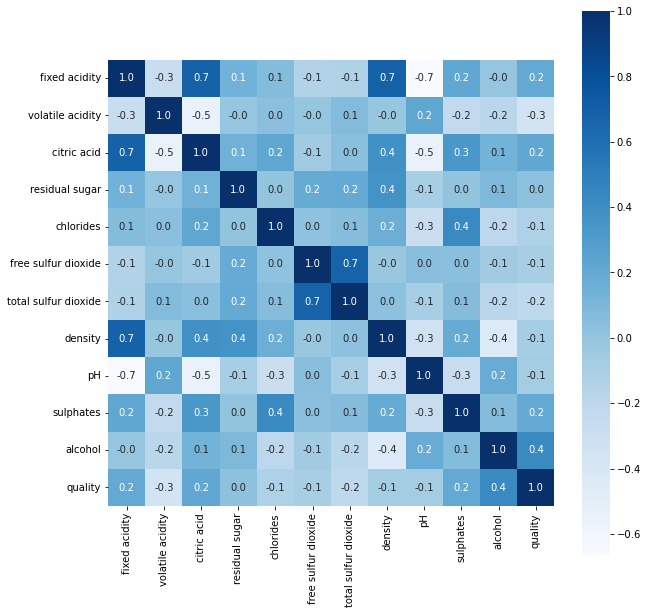

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_r, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':10}, cmap = 'Blues')

In [14]:
#selection data
x_w = data_w.drop('quality',axis = 1)
y_w = data_w['quality']
x_r = data_r.drop('quality',axis = 1)
y_r = data_r['quality']

In [15]:
#read data to test
test = pd.read_csv("test.csv", sep = ";")

In [16]:
test.type = test.type.apply(lambda x : x.replace("white","1"))
test.type = test.type.apply(lambda x : x.replace("red","0"))

In [17]:
test_w = test[test.type == '1']
test_r = test[test.type == '0']

In [18]:
#selection data
idt_w = test_w['id']
xt_w = test_w.drop('id',axis = 1)
idt_r = test_r['id']
xt_r = test_r.drop('id',axis = 1)

In [19]:
# Split data to train and test
from sklearn.model_selection import train_test_split
x_w_train,x_w_valid,y_w_train,y_w_valid= train_test_split(x_w,y_w,train_size =0.85,test_size=0.15,random_state = 0)

In [20]:
from sklearn.model_selection import train_test_split
x_r_train,x_r_valid,y_r_train,y_r_valid= train_test_split(x_r,y_r,train_size =0.85,test_size=0.15,random_state = 0)

In [21]:
#normalization data
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_w_fit = norm.fit(x_w_train)
new_x_w_train = norm_w_fit.transform(x_w_train)
new_x_w_test = norm_w_fit.transform(x_w_valid)
new_xt_w = norm_w_fit.transform(xt_w)

In [22]:
#normalization data
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_r_fit = norm.fit(x_r_train)
new_x_r_train = norm_r_fit.transform(x_r_train)
new_x_r_test = norm_r_fit.transform(x_r_valid)
new_xt_r = norm_r_fit.transform(xt_r)

In [23]:
### Training model

In [68]:
#model RandomForestRegressor
## w = random_state=29,n_estimators = 88,criterion='friedman_mse',max_depth = 30,max_features = 5
## r = random_state=37,n_estimators = 86,criterion='friedman_mse',max_depth = 25,max_features = 4
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
rf_w_model = RandomForestRegressor(random_state=29,n_estimators = 88,criterion='friedman_mse',max_depth = 30,max_features = 5)
#n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
#min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, 
#oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None

In [69]:
#fit training data
rf_w_model.fit(new_x_w_train,y_w_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=30, max_features=5,
                      n_estimators=88, random_state=29)

In [70]:
y_w_rf_predict = rf_w_model.predict(new_xt_w)

In [71]:
df_w = pd.DataFrame({'id':idt_w,'quality':y_w_rf_predict})

In [72]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
rf_r_model = RandomForestRegressor(random_state=37,n_estimators = 86,criterion='friedman_mse',max_depth = 25,max_features = 4)

In [73]:
rf_r_model.fit(new_x_r_train,y_r_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=25, max_features=4,
                      n_estimators=86, random_state=37)

In [74]:
y_r_rf_predict = rf_r_model.predict(new_xt_r)

In [75]:
df_r = pd.DataFrame({'id':idt_r,'quality':y_r_rf_predict})

In [76]:
fn_df = pd.concat([df_w,df_r])

In [77]:
fn_df = fn_df.sort_values('id')

In [78]:
fn_df.to_csv("sm_rf_wr.csv",index=False)

In [79]:
import math  
import sklearn.metrics  

In [36]:
data_result = pd.read_csv("check.csv")

In [45]:
#check test
#n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
#min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, 
#oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None
## w = random_state=5,n_estimators = 98,criterion='friedman_mse',max_depth = 19,max_features = 8
## r = random_state=37,n_estimators = 86,criterion='squared_error',max_depth = 25,max_features = 4
for i in range(1,11):
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    rf_w_model = RandomForestRegressor(
                        random_state=29,n_estimators = 88,criterion='friedman_mse',max_depth = 30,max_features = i
                                      )
    rf_w_model.fit(new_x_w_train,y_w_train)
    y_w_rf_predict = rf_w_model.predict(new_xt_w)
    df_w = pd.DataFrame({'id':idt_w,'quality':y_w_rf_predict})
    
    for j in range(1,11):
        from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
        rf_r_model = RandomForestRegressor(
                        random_state=37,n_estimators = 99,criterion='friedman_mse',max_depth = 19,max_features = j
                                          )
        rf_r_model.fit(new_x_r_train,y_r_train)
        y_r_rf_predict = rf_r_model.predict(new_xt_r)
        df_r = pd.DataFrame({'id':idt_r,'quality':y_r_rf_predict})
        
        fn_df = pd.concat([df_w,df_r])
        fn_df = fn_df.sort_values('id')
        
        data_predict = fn_df['quality']
        
        mse = sklearn.metrics.mean_squared_error(data_result, data_predict)
        rmse = math.sqrt(mse)  
        print("max_features_w:",i,"\\max_features_r:",j,"\\RMSE:", rmse)
        

max_features_w: 1 \max_features_r: 1 \RMSE: 0.7846150123391907
max_features_w: 1 \max_features_r: 2 \RMSE: 0.7836645707567218
max_features_w: 1 \max_features_r: 3 \RMSE: 0.7830012605304192
max_features_w: 1 \max_features_r: 4 \RMSE: 0.7827088907644865
max_features_w: 1 \max_features_r: 5 \RMSE: 0.7848606807780335
max_features_w: 1 \max_features_r: 6 \RMSE: 0.7855166411424215
max_features_w: 1 \max_features_r: 7 \RMSE: 0.7843486325016626
max_features_w: 1 \max_features_r: 8 \RMSE: 0.7859757301261702
max_features_w: 1 \max_features_r: 9 \RMSE: 0.7875646562852894
max_features_w: 1 \max_features_r: 10 \RMSE: 0.7854228593941169
max_features_w: 2 \max_features_r: 1 \RMSE: 0.7794170188098377
max_features_w: 2 \max_features_r: 2 \RMSE: 0.7784602308928206
max_features_w: 2 \max_features_r: 3 \RMSE: 0.7777924823592807
max_features_w: 2 \max_features_r: 4 \RMSE: 0.7774981538911583
max_features_w: 2 \max_features_r: 5 \RMSE: 0.7796643251128942
max_features_w: 2 \max_features_r: 6 \RMSE: 0.78032465

In [64]:
# random_state_w: 39 \random_state_r: 37 \RMSE: 0.7827599549152794
#     n_estimators_w: 82 \n_estimators_r: 86 \RMSE: 0.7819004334572324
#         criterion_w: friedman_mse \criterion_r: squared_error \RMSE: 0.781822956068837
#             max_depth_w: 24 \max_depth_r: 25 \RMSE: 0.7801985327170329
#                 max_features_w: 4 \max_features_r: 4 \RMSE: 0.7703313926586907
#                 max_features_w: 3 \max_features_r: 4 \RMSE: 0.770658930072413
## w = random_state=39,n_estimators = 82,criterion='friedman_mse',max_depth = 24,max_features = 4
## r = random_state=37,n_estimators = 86,criterion='squared_error',max_depth = 25,max_features = 4

#     n_estimators_w: 82 \n_estimators_r: 99 \RMSE: 0.7819324657719762
#         criterion_w: friedman_mse \criterion_r: squared_error \RMSE: 0.7818549915578011
#             max_depth_w: 24 \max_depth_r: 19 \RMSE: 0.7802065652649568
#                 max_features_w: 4 \max_features_r: 4 \RMSE: 0.7717464469448592
## w = random_state=39,n_estimators = 82,criterion='friedman_mse',max_depth = 24,max_features = 4
## r = random_state=37,n_estimators = 99,criterion='squared_error',max_depth = 19,max_features = 4

#             max_depth_w: 24 \max_depth_r: 27 \RMSE: 0.7802494730802145
#                 max_features_w: 4 \max_features_r: 4 \RMSE: 0.7710130899903652
#                 max_features_w: 3 \max_features_r: 4 \RMSE: 0.7713403379322059
## w = random_state=39,n_estimators = 82,criterion='friedman_mse',max_depth = 24,max_features = i
## r = random_state=37,n_estimators = 99,criterion='squared_error',max_depth = 27,max_features = j
##############################################################

# random_state_w: 29 \random_state_r: 37 \RMSE: 0.7832136584763114
#     n_estimators_w: 88 \n_estimators_r: 86 \RMSE: 0.7813138790604275
#         criterion_w: friedman_mse \criterion_r: squared_error \RMSE: 0.7806980850282755
#             max_depth_w: 30 \max_depth_r: 25 \RMSE: 0.7805631593966947
#                 max_features_w: 5 \max_features_r: 4 \RMSE: 0.7684107631456742
#                 max_features_w: 4 \max_features_r: 4 \RMSE: 0.76937864770482
## w = random_state=29,n_estimators = 88,criterion='friedman_mse',max_depth = 30,max_features = 5
## r = random_state=37,n_estimators = 86,criterion='squared_error',max_depth = 25,max_features = 4

#         criterion_w: friedman_mse \criterion_r: friedman_mse \RMSE: 0.7807837947346199
#             max_depth_w: 30 \max_depth_r: 25 \RMSE: 0.7806482434453704
#                 max_features_w: 5 \max_features_r: 4 \RMSE: 0.7686871234895877
#                 max_features_w: 4 \max_features_r: 4 \RMSE: 0.7696546605099437
## w = random_state=29,n_estimators = 88,criterion='friedman_mse',max_depth = 30,max_features = 5
## r = random_state=37,n_estimators = 86,criterion='friedman_mse',max_depth = 25,max_features = 4

#     n_estimators_w: 88 \n_estimators_r: 99 \RMSE: 0.7813459354217485
#         criterion_w: friedman_mse \criterion_r: squared_error \RMSE: 0.780730166673769
#             max_depth_w: 30 \max_depth_r: 19 \RMSE: 0.7805711881923905
#                 max_features_w: 5 \max_features_r: 4 \RMSE: 0.7698293478262919
## w = random_state=29,n_estimators = 88,criterion='friedman_mse',max_depth = 30,max_features = 5
## r = random_state=37,n_estimators = 99,criterion='squared_error',max_depth = 19,max_features = 4

#         criterion_w: friedman_mse \criterion_r: friedman_mse \RMSE: 0.7808049621609762
#             max_depth_w: 30 \max_depth_r: 19 \RMSE: 0.7805992645052684
#                 max_features_w: 5 \max_features_r: 4 \RMSE: 0.7702532688734198
## w = random_state=29,n_estimators = 88,criterion='friedman_mse',max_depth = 30,max_features = i
## r = random_state=37,n_estimators = 99,criterion='friedman_mse',max_depth = 19,max_features = j


###########################################################
# random_state_w: 5 \random_state_r: 37 \RMSE: 0.7835355149044179
#     n_estimators_w: 98 \n_estimators_r: 86 \RMSE: 0.7825475644476488
#         criterion_w: friedman_mse \criterion_r: squared_error \RMSE: 0.782002409566692
#             max_depth_w: 19 \max_depth_r: 25 \RMSE: 0.7783873252094111
#                 max_features_w: 8 \max_features_r: 4 \RMSE: 0.7724936090424419
## w = random_state=5,n_estimators = 98,criterion='friedman_mse',max_depth = 19,max_features = 8
## r = random_state=37,n_estimators = 86,criterion='squared_error',max_depth = 25,max_features = 4
#                 max_features_w: 5 \max_features_r: 4 \RMSE: 0.7730882265169841
## w = random_state=5,n_estimators = 98,criterion='friedman_mse',max_depth = 19,max_features = 5
## r = random_state=37,n_estimators = 86,criterion='squared_error',max_depth = 25,max_features = 4
#     n_estimators_w: 98 \n_estimators_r: 99 \RMSE:
#         criterion_w: friedman_mse \criterion_r: squared_error \RMSE:
#             max_depth_w: 19 \max_depth_r: 19 \RMSE: 0.7783382039952075
#                 max_features_w: 8 \max_features_r: 3 \RMSE: 0.7742021784142138
## w = random_state=5,n_estimators = 98,criterion='friedman_mse',max_depth = 19,max_features = 8
## r = random_state=37,n_estimators = 99,criterion='squared_error',max_depth = 19,max_features = 3